# **▶️ Hora de pasar a la acción ▶️**
### 🖥️ **Demos - Enlace semántico, cuando Power BI conoció Spark**

#### **🧷 Importaciones y referencias 🧷**

---

In [1]:
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata
import datetime

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 3, Finished, Available)

#### **🛠️ Setup & configuración 🛠️**

---

In [2]:
workspace_name = 'WORKSPACE_NAME'
dataset_name="DATASET_NAME"

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 4, Finished, Available)

#### **1️⃣ Empecemos por lo básico**

---

In [3]:
# Obtener modelos semánticos del área de trabajo
fabric.list_datasets(workspace=workspace_name)

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 5, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,Competitive Marketing Analysis,7925fe0f-b1c7-41d3-a6eb-5c08e3eced0e,2014-08-31 19:43:29,NaT
1,Employee Hiring and History,522fbfea-3576-4eae-a052-8789afbc9f84,2014-07-23 22:14:05,NaT
2,Revenue Opportunities,2ba5059f-68e3-4b2c-b793-95395cafdee1,2020-11-10 19:23:36,NaT
3,Retail Stores Analysis,ca13b63e-e903-41ca-a013-3b9b35dd88b9,2023-05-13 16:58:35,NaT
4,sempy_lakehouse,c4ce69e4-95be-44f7-a87c-1c8288ef2f11,2021-02-12 23:00:58,NaT


In [4]:
# Obtener tablas existentes dentro del modelo
fabric.list_tables(workspace=workspace_name, dataset=dataset_name)

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 6, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,Customer,Customer information and characteristics,False,,Table
1,Date,Calendar table,False,Time,Table
2,Product,Product information including classification a...,False,,Table
3,Store,Information and characteristics of the superma...,False,,Table
4,Sales,Sales and orders placed,True,,Table
5,Metrics,Table who gathers all the model's metrics dist...,False,,Table


In [5]:
# Listar las relaciones entre las tablas
model_relationships = fabric.list_relationships(workspace=workspace_name, dataset=dataset_name)
model_relationships

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 7, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,Sales,CustomerKey,Customer,CustomerKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-05-13 17:15:45,be326aad-94f5-4e0e-a928-a54f4ba63cfe
1,m:1,Sales,ProductKey,Product,ProductKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-05-13 17:15:45,6e9975a5-b22e-4aae-acf4-79b93064258a
2,m:1,Sales,StoreKey,Store,StoreKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-05-13 17:15:45,82a607b4-851e-4c4b-9651-146024e5235d
3,m:1,Sales,OrderDateKey,Date,DateKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2023-05-13 17:17:23,2f9fa679-948f-4157-b4cc-13a501c24afa
4,m:1,Sales,DeliveryDateKey,Date,DateKey,False,OneDirection,OneDirection,DateAndTime,False,Ready,2024-03-06 08:21:33,d0e8a13a-8087-4b8f-8fe5-eeae0dc8fdf8


StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 8, Finished, Available)

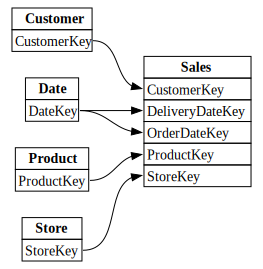

In [6]:
# Visualizar las relaciones definidas
plot_relationship_metadata(model_relationships)

In [7]:
# Obtener métricas definidas
fabric.list_measures(workspace=workspace_name, dataset=dataset_name)

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 9, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description,Format String,Data Category,Detail Rows Definition,Format String Definition
0,Metrics,Orders,DISTINCTCOUNT(Sales[Order Number]),Int64,False,Orders,Total orders placed,"#,0",,None,None
1,Metrics,Orders YTD,"TOTALYTD([Orders], 'Date'[Date])",Int64,False,Orders,Orders backlog,0,,None,None
2,Metrics,Orders LY YTD,"\nCALCULATE ( [Orders YTD], SAMEPERIODLASTYEAR...",Int64,False,Orders,Annual order backlog for the previous year,"#,0",,None,None
3,Metrics,Orders Delivered,"CALCULATE( [Orders], USERELATIONSHIP('Date'[Da...",Int64,False,Orders,Total orders delivered,"#,0",,None,None
4,Metrics,Pending Orders,"\nCALCULATE (\n [Orders],\n FILTER (\n ...",Int64,False,Orders,Total pending orders,0,,None,None
5,Metrics,Units Sold,SUM(Sales[Quantity]),Int64,False,Sales,Number of product units sold,"#,0",,None,None
6,Metrics,Total Sales,COUNTROWS(DISTINCT(Sales[Order Number])),Int64,False,Sales,Number of sales made,0,,None,None
7,Metrics,Amount,"SUMX(Sales, (Sales[Unit Price] * Sales[Quantit...",Double,False,Analysis and trends,Total amount sold,,,None,None
8,Metrics,Sales Amount,"\nCALCULATE (\n [Amount],\n FILTER (\n ...",Double,False,Sales,Accumulated sales made,"#,0.00\ ""€"";-#,0.00\ ""€"";#,0.00\ ""€""",,None,None
9,Metrics,Sales Amount YTD,"TOTALYTD([Amount], 'Date'[Date])",Double,False,Sales,Sales backlog,,,None,None


In [10]:
# ¡Y mucho más!
fabric.list_gateways()

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 12, Finished, Available)

,Gateway Id,Gateway Name,Gateway Type
0,a64f56cb-8901-4565-9aca-fc92fd1ff55d,Bifrost,Resource
1,12a1e3ff-e6a6-499f-a21d-bb1c05e5b882,GATEWAY-PRUEBA,Resource


#### **2️⃣ Subamos el nivel**

---

##### 🔌 *Uso del conector nativo y consulta vía SparkSQL*

In [11]:
spark.conf.set("spark.sql.catalog.pbi", "com.microsoft.azure.synapse.ml.powerbi.PowerBICatalog")

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 13, Finished, Available)

In [12]:
%%sql
-- Mostrar las tablas del contenido de nuestra área de trabajo
SHOW TABLES FROM pbi

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 14, Finished, Available)

<Spark SQL result set with 50 rows and 3 fields>

In [13]:
%%sql
-- Podemos realizar consultas directamente sobre el modelo
SELECT * 
FROM pbi.`Retail Stores Analysis`.Store
LIMIT 10

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 15, Finished, Available)

<Spark SQL result set with 10 rows and 8 fields>

In [15]:
%%sql
-- Las funciones de agregado solo se requieren para temas de sintaxis, no tienen efecto a la hora de computar el resultado de la métrica
SELECT
    `Customer[Country]` AS Country,
    `Product[Category]` AS Category,
    AVG(`Units Sold`) AS `Units sold`,
    SUM(`Orders Delivered`) AS `Orders delivered`
FROM
    pbi.`Retail Stores Analysis`.`_Metrics`
WHERE
    `Date[Year]` = 2020
GROUP BY
    `Customer[Country]`,
    `Product[Category]`
ORDER BY `Units sold` DESC


StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 17, Finished, Available)

<Spark SQL result set with 64 rows and 4 fields>

---
<br>

##### 🥷 *Be DAXter my friend*
<br>

###### 🪄 Necesitamos cargar la extensión para que se reconozca el magic command

In [16]:
%load_ext sempy

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 18, Finished, Available)

In [17]:
%%dax "Retail Stores Analysis"
/* Misma consulta que en el anterior caso pero en DAX */
EVALUATE
CALCULATETABLE (
    ADDCOLUMNS (
        SUMMARIZE ( 'Sales', 'Customer'[Country], 'Product'[Category] ),
        "Units sold", [Units Sold],
        "Orders delivered", [Orders Delivered]
    ),
    'Date'[Year] = 2020
)
ORDER BY [Units Sold] DESC

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 19, Finished, Available)

,Customer[Country],Product[Category],[Units sold],[Orders delivered]
0,United States,Cell phones,67472,16502
1,United States,Computers,60818,15104
2,United States,"Music, Movies and Audio Books",49458,12862
3,United States,Games and Toys,29594,8308
4,Germany,Cell phones,24046,5833
...,...,...,...,...
59,France,TV and Video,1168,373
60,Italy,Home Appliances,1144,330
61,Italy,Audio,965,297
62,Italy,Cameras and camcorders,806,262


###### ✨ Podemos también ejecutar a través de Spark

In [18]:
# Métricas
fabric.evaluate_measure(workspace=workspace_name, \
                        dataset=dataset_name, \
                        groupby_columns=["'Customer'[Country]", "Product[Category]"], \
                        measure= ['Units Sold', 'Orders Delivered'], \
                        filters = { "Date[Year]": ["2020"]})

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 20, Finished, Available)

,Country,Category,Units Sold,Orders Delivered
0,Australia,Audio,2664,806
1,Australia,Cameras and camcorders,2907,847
2,Australia,Cell phones,12693,3032
3,Australia,Computers,11447,2835
4,Australia,Games and Toys,5521,1566
...,...,...,...,...
59,United States,Computers,60818,15104
60,United States,Games and Toys,29594,8308
61,United States,Home Appliances,18642,5557
62,United States,"Music, Movies and Audio Books",49458,12862


In [19]:
# Consultas DAX
dax_query = """EVALUATE
                CALCULATETABLE (
                    ADDCOLUMNS (
                        SUMMARIZE ( 'Sales', 'Customer'[Country], 'Product'[Category] ),
                        "Units sold", [Units Sold],
                        "Orders delivered", [Orders Delivered]
                    ),
                    'Date'[Year] = 2020
                )
                ORDER BY [Units Sold] DESC
            """

fabric.evaluate_dax(workspace=workspace_name, \
                    dataset=dataset_name, \
                    dax_string=dax_query)

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 21, Finished, Available)

,Customer[Country],Product[Category],[Units sold],[Orders delivered]
0,United States,Cell phones,67472,16502
1,United States,Computers,60818,15104
2,United States,"Music, Movies and Audio Books",49458,12862
3,United States,Games and Toys,29594,8308
4,Germany,Cell phones,24046,5833
...,...,...,...,...
59,France,TV and Video,1168,373
60,Italy,Home Appliances,1144,330
61,Italy,Audio,965,297
62,Italy,Cameras and camcorders,806,262


#### **3️⃣ Ya sé Kung fu**

---

<center><img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExaDd3OGJlYmZiemF2cmpjbjVtNzV1OWhwczBrcGZ1czNyNDM0eDVjaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o7btNhMBytxAM6YBa/giphy.webp" height="250"></center>

<br>

##### 🧩 *Uniendo las piezas del puzzle*

In [21]:
# Obtenemos los modelos dentro del área de trabajo
workspace_models = fabric.list_datasets(workspace=workspace_name)

# Excluimos el modelo asociado al lakehouse por defecto
exclude_mask = workspace_models['Dataset Name'] == 'sempy_lakehouse'
workspace_models = workspace_models[~exclude_mask]

# Valores que emplearemos
now = datetime.datetime.now()
dax_query = """EVALUATE
                VAR _table =
                NATURALLEFTOUTERJOIN(
                    SELECTCOLUMNS(
                        INFO.TABLES(),
                        "TableID", [ID],
                        "TableName", [Name]
                    ),
                    SELECTCOLUMNS(
                        INFO.REFRESHPOLICIES(),
                        [TableID],
                        [RollingWindowGranularity],
                        [RollingWindowPeriods],
                        [IncrementalPeriods]
                    )
                )
                VAR _column = SELECTCOLUMNS(
                    INFO.COLUMNS(),
                    [TableID],
                    "ColumnName", [ExplicitName],
                    "ColumnID", [ID],
                    "ColumnDescription", [Description],
                    [IsHidden],
                    [IsUnique],
                    [IsKey],
                    [ModifiedTime]
                )
                RETURN
                    FILTER(
                        NATURALLEFTOUTERJOIN(
                            _table,
                            _column
                        ),
                        NOT (CONTAINSSTRING(
                            [ColumnName],
                            "rownumber-"
                        ))
                    )
                """

# Recorremos cada modelo
for ind in workspace_models.index:
    model_loop = workspace_models["Dataset Name"][ind]
    result = fabric.evaluate_dax(workspace=workspace_name, \
                                dataset=model_loop, \
                                dax_string= dax_query)

    # Añadimos columnas extra
    result.insert(0, 'Workspace', workspace_name)
    result.insert(1, 'DatasetName', model_loop)
    result["InsertDate"] = now

    # Convertimos a dataframe y escribimos en tabla
    spark_df = spark.createDataFrame(result)
    spark_df.write.format("delta").mode("append").saveAsTable("PBIDaysBilbao_Model_Info")

StatementMeta(, d3afeb45-40cb-464d-9914-d3ebea94a322, 23, Finished, Available)

---

</br>

##### ⚙️ *Procesado de modelos semánticos*

</br>

###### Recordemos, solo para Premium/Fabric 💎

In [ ]:
# Definimos el script de procesado
tmsl_script = {
                "refresh": {
                    "type": "full",
                    "objects": [
                        {
                            "database": "Retail Stores Analysis",
                            "table": "Customer"
                        },
                        {
                            "database": "Retail Stores Analysis",
                            "table": "Product"
                        },
                        {
                            "database": "Retail Stores Analysis",
                            "table": "Sales"
                        }
                    ]
                }
            }

# Ejecutamos el script
fabric.execute_tmsl(workspace=workspace_name, script=tmsl_script)

###### O quizá no...😁

</br>

Podemos usar la llamada al [API Rest de Power BI](https://learn.microsoft.com/en-us/rest/api/power-bi/datasets/refresh-dataset-in-group) para refrescar modelos en capacidad compartida

In [ ]:
# Podemos instanciar el cliente REST de Power BI
pbi_client = fabric.PowerBIRestClient()

# Indicamos valores para el modelo que queremos refrescar
datasetId = "DATASET_GUID"
groupId = "WORKSPACE_GUID"

# Realizamos la petición
pbi_client.post(f"/v1.0/myorg/groups/{groupId}/datasets/{datasetId}/refreshes")